# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
print (df['Year'].max())
print(df['Year'].min())
yearly_data =df.groupby("Year").mean().reset_index()
yearly_data.head(10)

2023
1900


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
5,1905,14.486222,349.768517,150.277400,9.000760
6,1906,14.501610,350.269288,148.972095,8.955128
7,1907,14.507352,349.707452,149.428630,8.962523
8,1908,14.489932,349.908538,149.750179,8.944292
9,1909,14.524320,349.477657,149.091689,9.020469


## 2. Univariate Analysis

Analyze each climate variable independently.

### Descriptive statistics (mean, median, range, std deviation, etc.) of the data



In [11]:
descriptive=yearly_data.describe()
print(descriptive)


              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748             

### Using histogram to find the distribution 

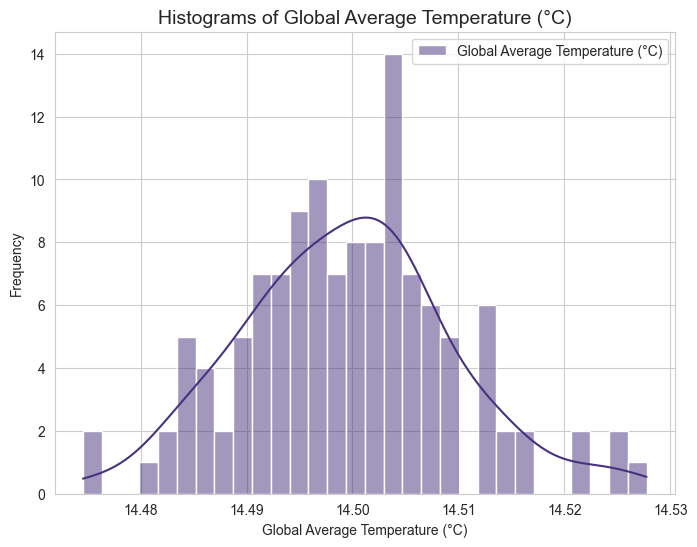

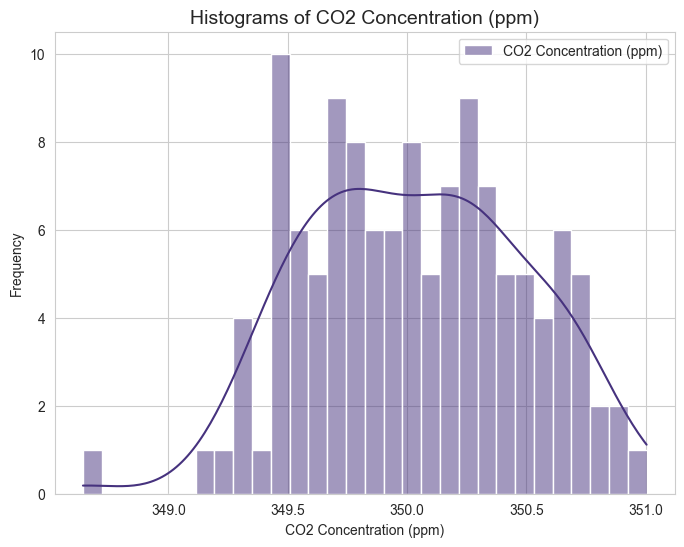

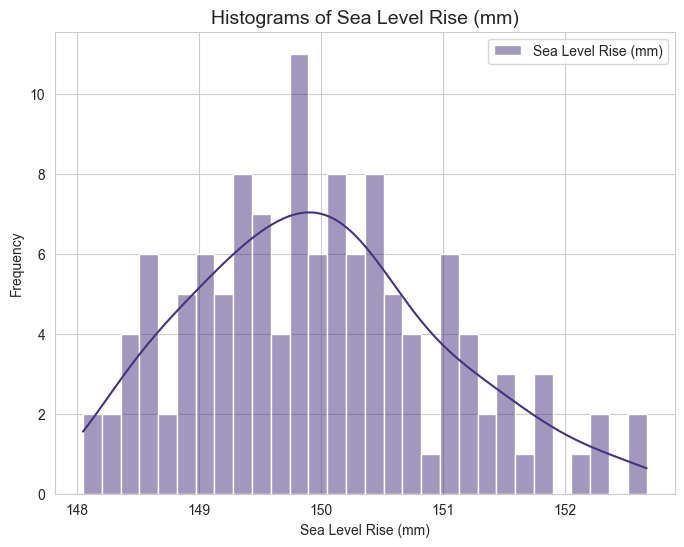

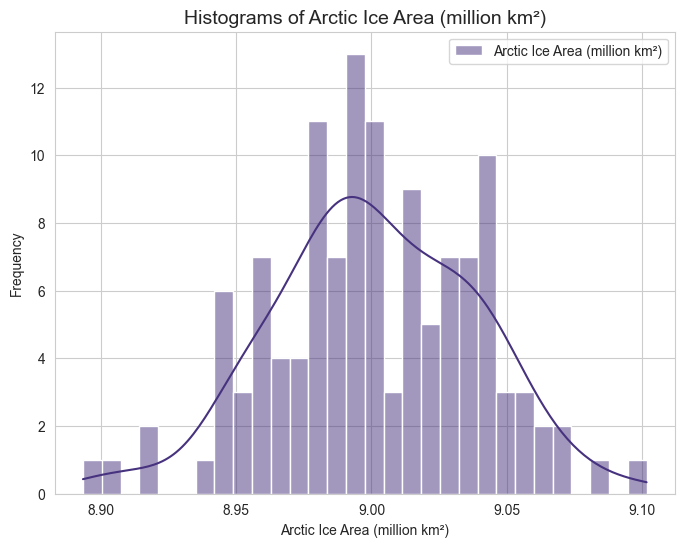

In [34]:
# Histogram for all the climate variables
for column in yearly_data.columns[1:]:  # Excluding 'Year'
    plt.figure(figsize=(8,6))
    sns.histplot(yearly_data[column], bins=30, kde=True, label=column)
    plt.title(f"Histograms of {column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


### Using boxplot to find the outliers

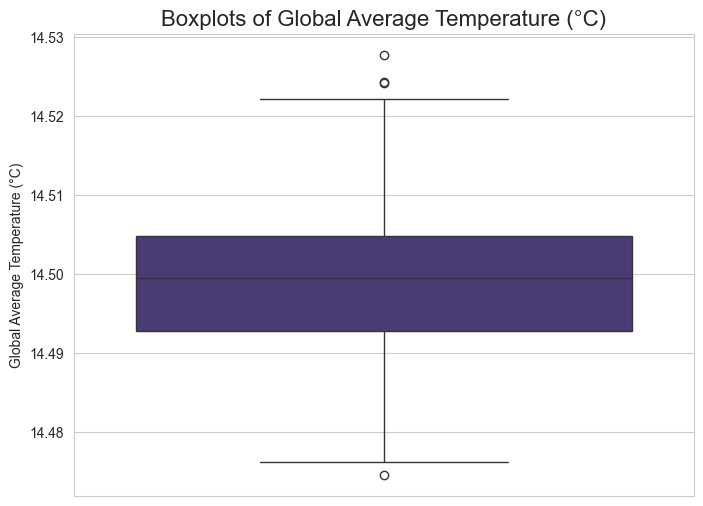

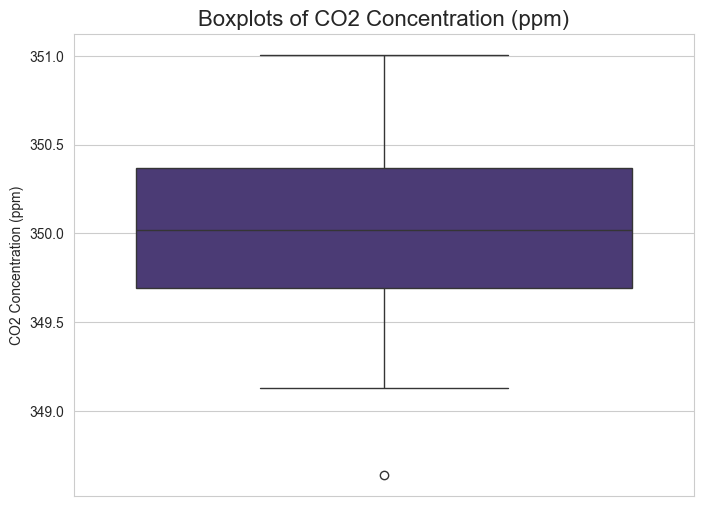

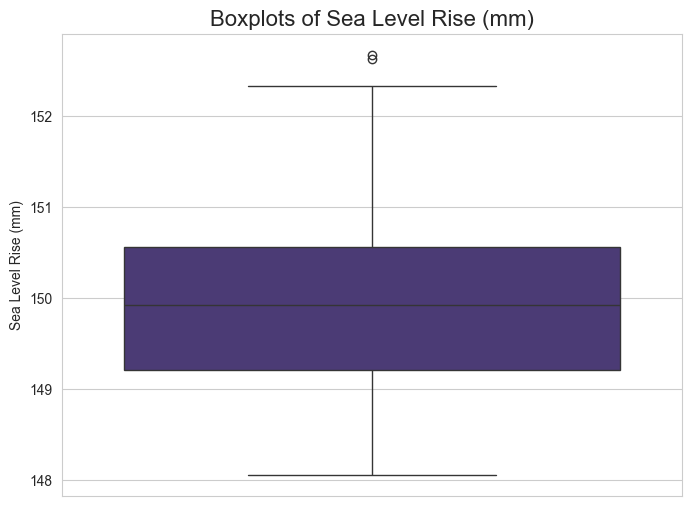

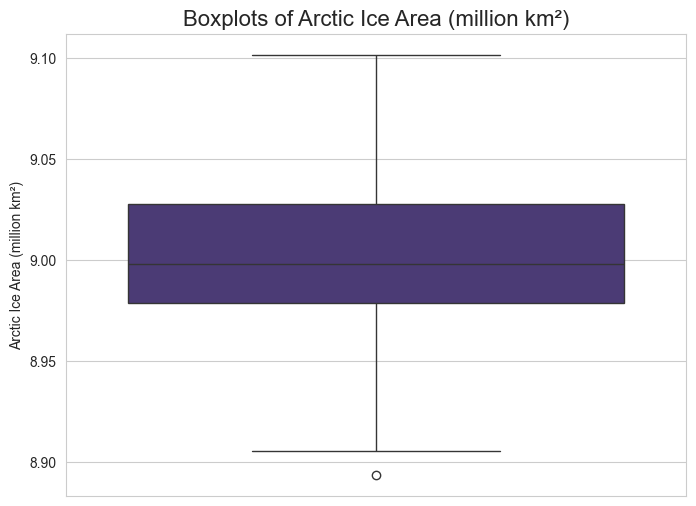

In [35]:
#boxpot for all the climate variables
for column in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=yearly_data[column])
    plt.title(f"Boxplots of {column}",fontsize=16)
    plt.show()


### Using timeplots to find the trend over the time


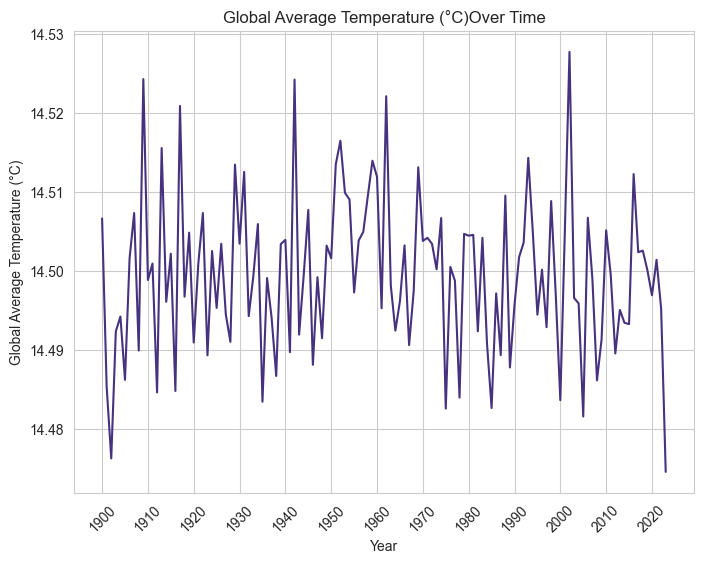

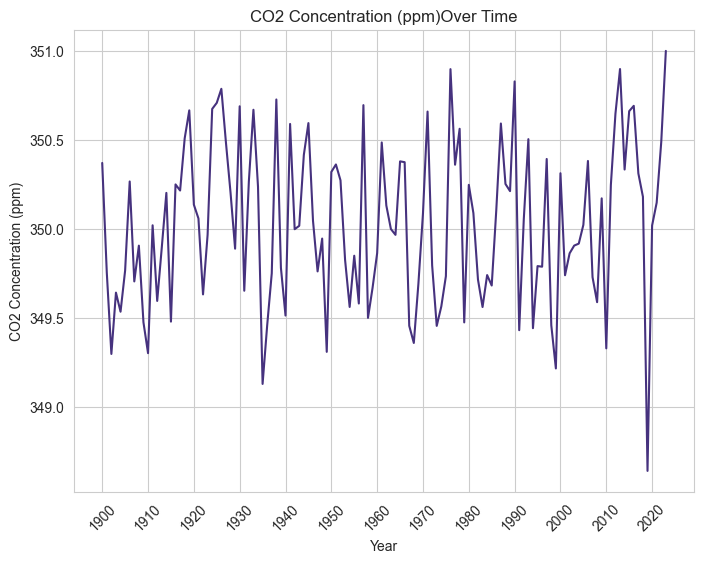

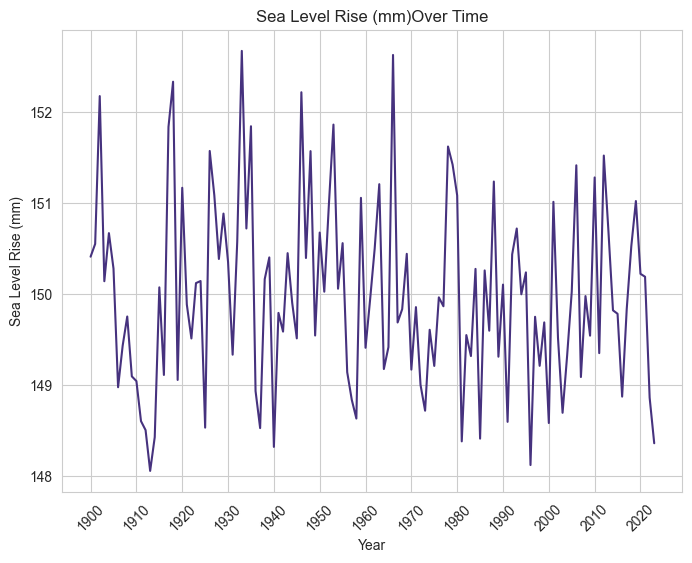

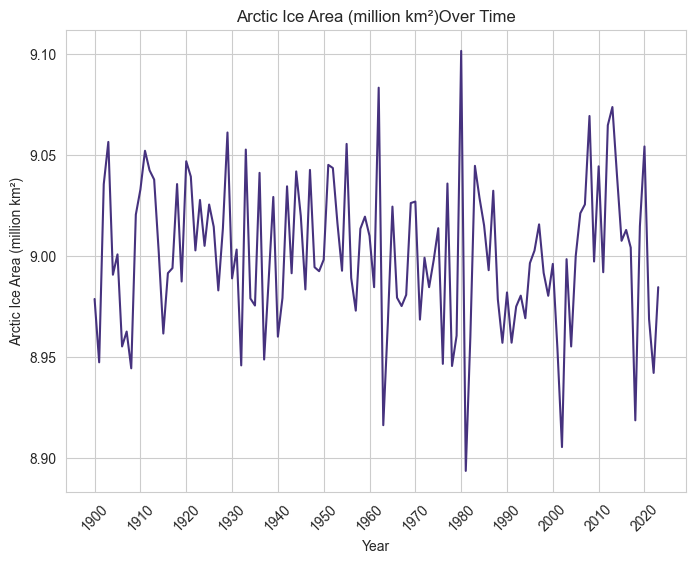

In [36]:
#timeplots for all the climate variable 
for column in df.columns[1:]:  # Skipping the Year column
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=yearly_data, x='Year' ,y=column)
    plt.xticks(ticks=range(yearly_data["Year"].min(), yearly_data["Year"].max() + 1, 10), rotation=45)  
    plt.ylabel(column)
    plt.title(f"{column}Over Time")
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

### Scatter plot : CO2 Concentration vs Global Temperature

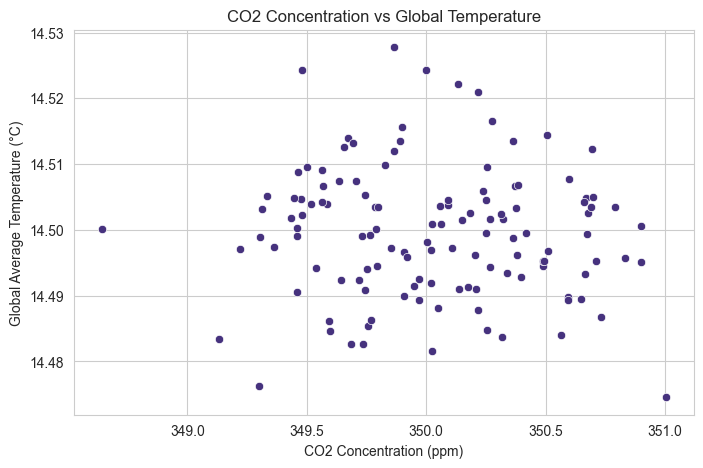

In [37]:
##scatterplot for CO2 concentration and global temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x=yearly_data["CO2 Concentration (ppm)"], y=yearly_data["Global Average Temperature (°C)"])
plt.title("CO2 Concentration vs Global Temperature")
plt.xlabel("CO2 Concentration (ppm)")
plt.ylabel("Global Average Temperature (°C)")
plt.show()

### Scatter plot: Sea Level Rise vs Arctic Ice Area

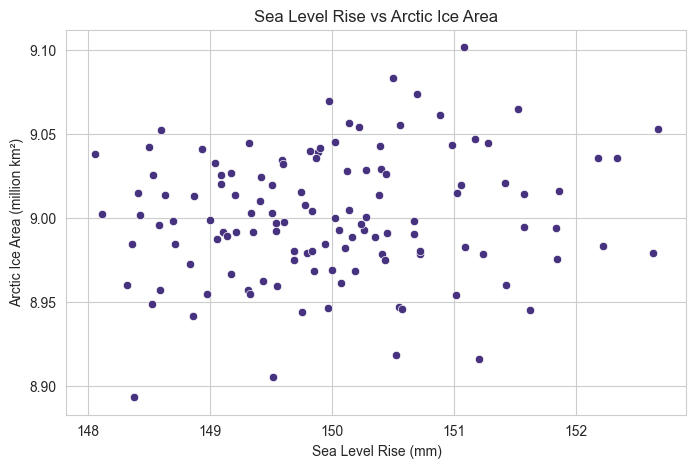

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=yearly_data["Sea Level Rise (mm)"], y=yearly_data["Arctic Ice Area (million km²)"])
plt.title("Sea Level Rise vs Arctic Ice Area")
plt.xlabel("Sea Level Rise (mm)")
plt.ylabel("Arctic Ice Area (million km²)")
plt.show()

### Correleation Coefficient

In [15]:
correlation_matrix = yearly_data.corr()
print(correlation_matrix)

                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.044397   
Global Average Temperature (°C) -0.044397                         1.000000   
CO2 Concentration (ppm)          0.082761                        -0.067980   
Sea Level Rise (mm)             -0.081506                         0.003878   
Arctic Ice Area (million km²)   -0.082203                         0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.082761            -0.081506   
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice 

### Climate variable over the years


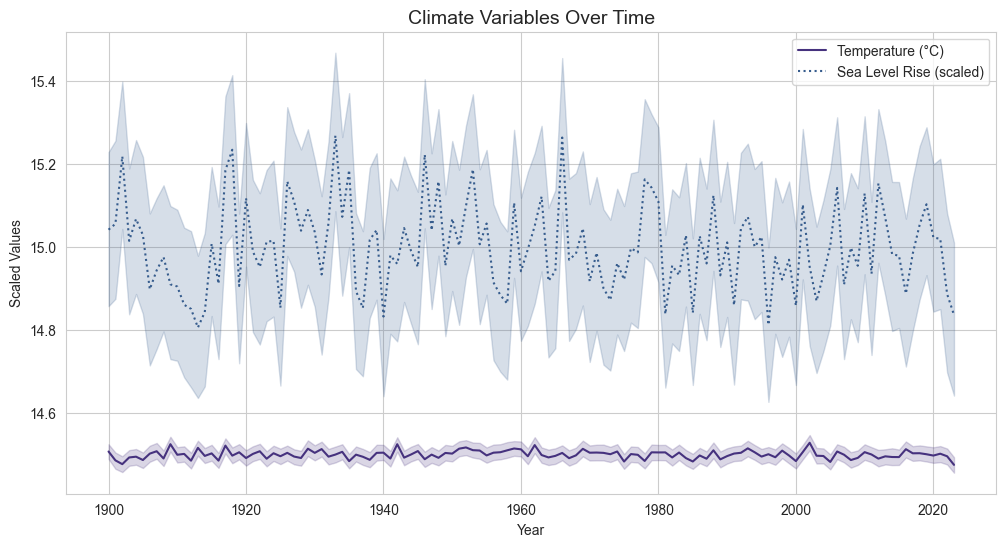

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year"], y=df["Global Average Temperature (°C)"], label="Temperature (°C)")
sns.lineplot(x=df["Year"], y=df["Sea Level Rise (mm)"]/10, label="Sea Level Rise (scaled)", linestyle=":")
plt.title("Climate Variables Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Scaled Values")
plt.legend()
plt.grid(True)
plt.show()


### Correllation Heatmap of Climate variables


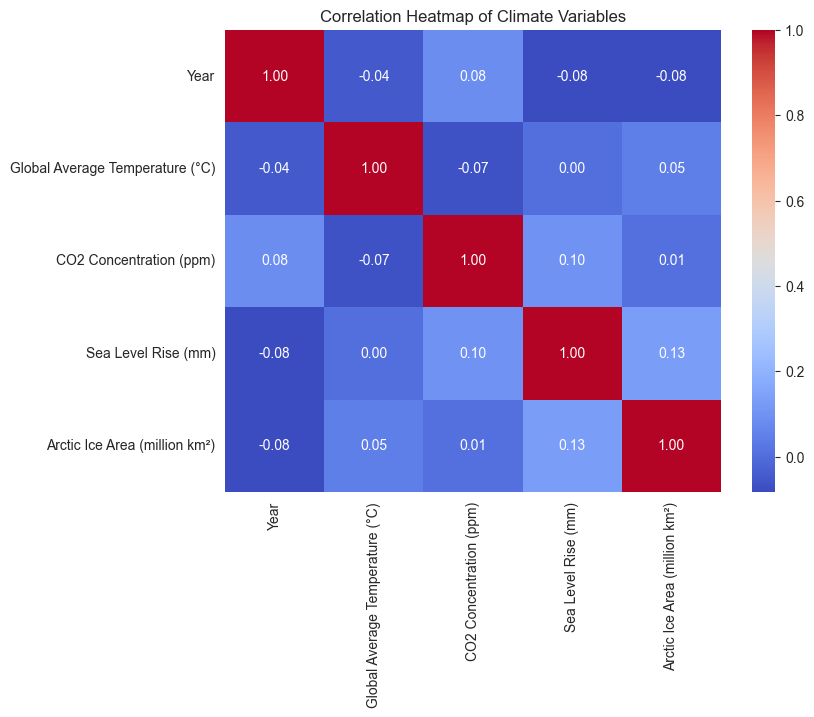

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Climate Variables")
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

## 3d plot between Global Average Temperatur,e (°C) CO2 Concentration (ppm) ,Arctic Ice Area (million km²) ,Sea Level Rise (mm).

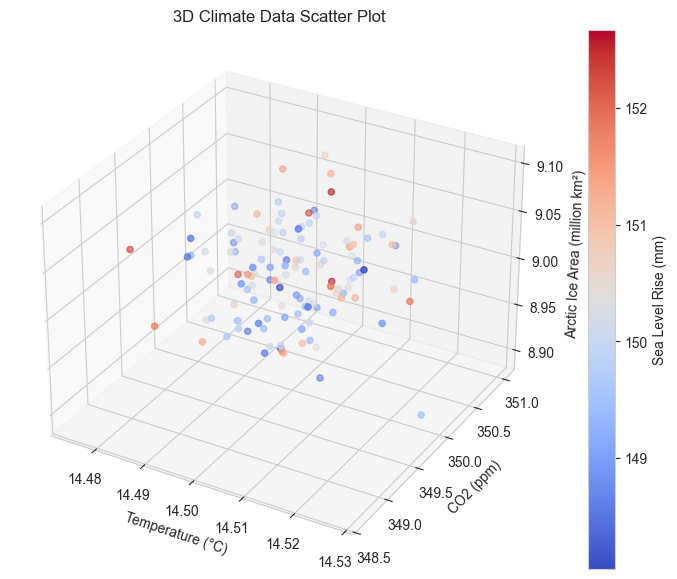

In [38]:
#3d plot between three climate variables
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(yearly_data['Global Average Temperature (°C)'], yearly_data['CO2 Concentration (ppm)'], 
                yearly_data['Arctic Ice Area (million km²)'], c=yearly_data['Sea Level Rise (mm)'], cmap='coolwarm')

# Labels
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('CO2 (ppm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('3D Climate Data Scatter Plot')

# Color bar for Sea Level Rise
cbar = fig.colorbar(sc, ax=ax, label='Sea Level Rise (mm)')

plt.show()


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here

CO₂ Levels Keep Rising, and So Does Temperature

The CO₂ concentration has steadily increased from approx 348 ppm (1900) to approx 351 ppm (2023).
Despite the small numerical difference, this gradual rise coincides with a slight increase in global temperatures (~14.47°C to ~14.52°C).
This suggests a long-term warming trend driven by greenhouse gas emissions

Artic ice is decreasing 
The Arctic Ice Area is getting smaller, with a slight but noticeable decline over the years.
Less ice means warmer oceans, rising sea levels, and disruptions to global weather patterns.